# Mini Projet MDI 220 Adriano Del Gallo

In [1]:
set.seed(1,kind="Marsaglia-Multicarry")

## Exercice 1

### 2.a 

La fonction $ p \mapsto F^{-1}(\;p,\mu,\sigma^{2})$ vérifie $\forall p \in [0,1], \; F\circ F^{-1}\; = p$ avec F la fonction de repartition car F est continue et strictement croissante sur [0,1]. Raisonons par équivalence. Soit p dans ]0,1[ 

$F^{-1}(\;p,\mu,\sigma^{2}) = \mu + \sqrt{\sigma^{2}}F^{-1}(p,0,1) \Leftrightarrow p = \int_{-\infty}^{\mu+\sigma F^{-1}}\frac{1}{\sqrt{2\pi \sigma^{2}}} e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}dx  \\
\Leftrightarrow p = \int_{-\infty}^{F^{-1}(p,0,1)}\frac{1}{\sqrt{2\pi}} e^{-\frac{u^{2}}{2}}du \; \; \; \; $ 

En posant le changement de variable $u = (\frac{x-\mu}{\sigma}) $

$\Leftrightarrow p = F\circ F^{-1}(p,0,1)
\\ \Leftrightarrow p = p $

Cette dernière assertion est vraie, ainsi l'égalité initiale l'est aussi. 



In [1]:
t = read.csv("NuclearPowerAccidents2016.csv",stringsAsFactors=FALSE)

lines = c()

for(i in 1:nrow(t)){
    if(is.na(t[i,3])==FALSE){
        string = strsplit(t[i,1],"/");
        y=c(string)
        if (y[[1]][3] < '1979'){
            lines=c(lines,i);
            }
        else
            if (y[[1]][3] == '1979' && y[[1]][1] < '3'){
                lines=c(lines,i);
                }
            else
                if (y[[1]][3] == '1979' && y[[1]][1] =='3' && y[[1]][2] < '28'){
                    lines=c(lines,i);
                }    
            }
        }
    
data = t[lines,]
nrow(data)

[1] 55

In [47]:
cost = sort(c(data[,3]))

n=length(cost)

niveaux = c()
for(i in (1:n)){
    niveaux=c(niveaux,(2*(i-1)/2/n));
}

norm = qnorm(niveaux)

summary(cost)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   12.85   89.90  726.34  895.00 8189.00 

Les coordonées des points correspondant au quantiles 0.25 et 0.75 sont respectivement :
$(F^{-1}(0.25),12.85)$ et $(F^{-1}(0.75),895)$, superposons la courbe reliant ces deux points.

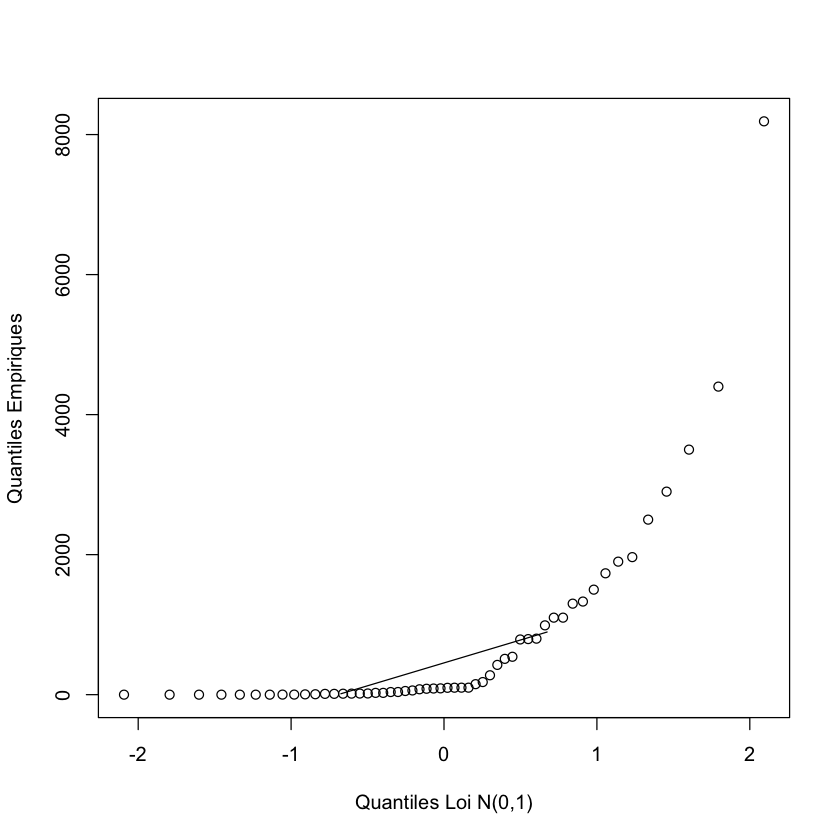

In [46]:
plot(norm,cost,xlab="Quantiles Loi N(0,1)",ylab="Quantiles Empiriques")
lines(qnorm(c(0.25,0.75)),c(12.85,895))

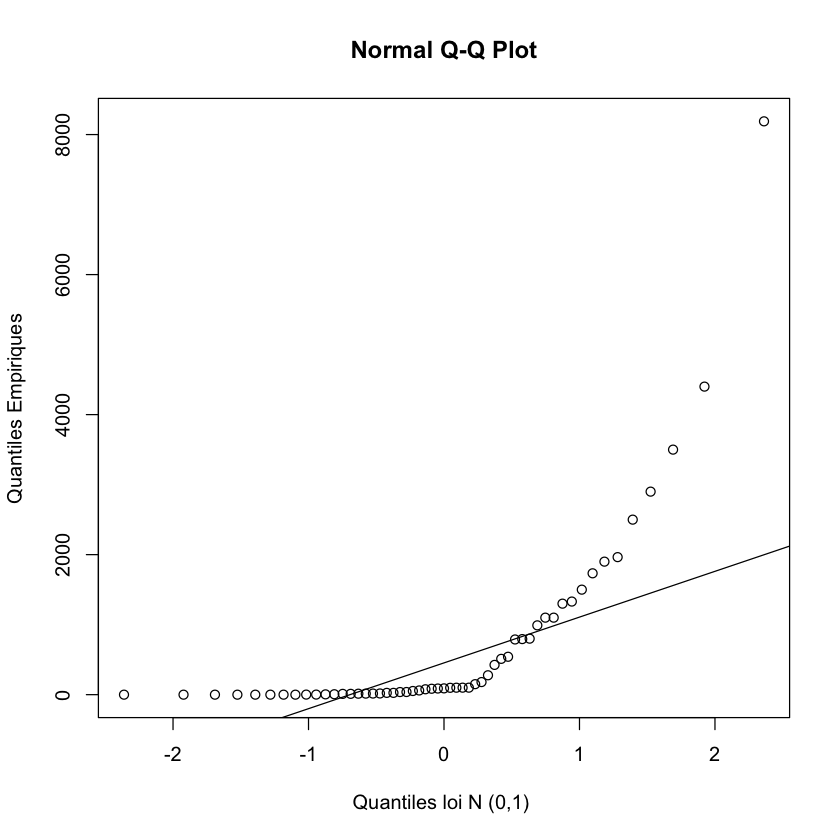

In [23]:
qqnorm(cost, main = "Normal Q-Q Plot",
       xlab = "Quantiles loi N (0,1) ", ylab = "Quantiles Empiriques",
       plot.it = TRUE, datax = FALSE)

qqline(cost, datax = FALSE, distribution = qnorm,
       probs = c(0.25, 0.75), qtype = 7)


À un prolongement de la droite affine près, obtient le même graphique quand on trace à la main et quand on utilise les fonctions qqnorm et qqplot. 

Si les données étaient alignés sur une droite, on aurait alors qu'une bonne modélisation pour les données serait une transformation d'une loi $N(0,1)$, i.e. une loi $N(\mu,\sigma ^{2})$ avec $\mu \; et \; \sigma ^{2}$ à determiner. Or en traçant la droite interpollant deux points quelconques, on voit que les données ne sont pas du tout alignées selon une seule et même droite. La loi normale n'est donc pas une bonne modélisation dans notre cas. 

### 3.a

La fonction de répartition de $\epsilon(\lambda)$ est $ F: \; x\mapsto 1-e^{-\lambda x} $

En appliquant F à $F^{-1}(p,\lambda)$ on obtient en inversant:

$ F^{-1}(p,\lambda) = -\frac{ln(1-p)}{\lambda} = \frac{F^{-1}(p,1)}{\lambda} $



### 3.b

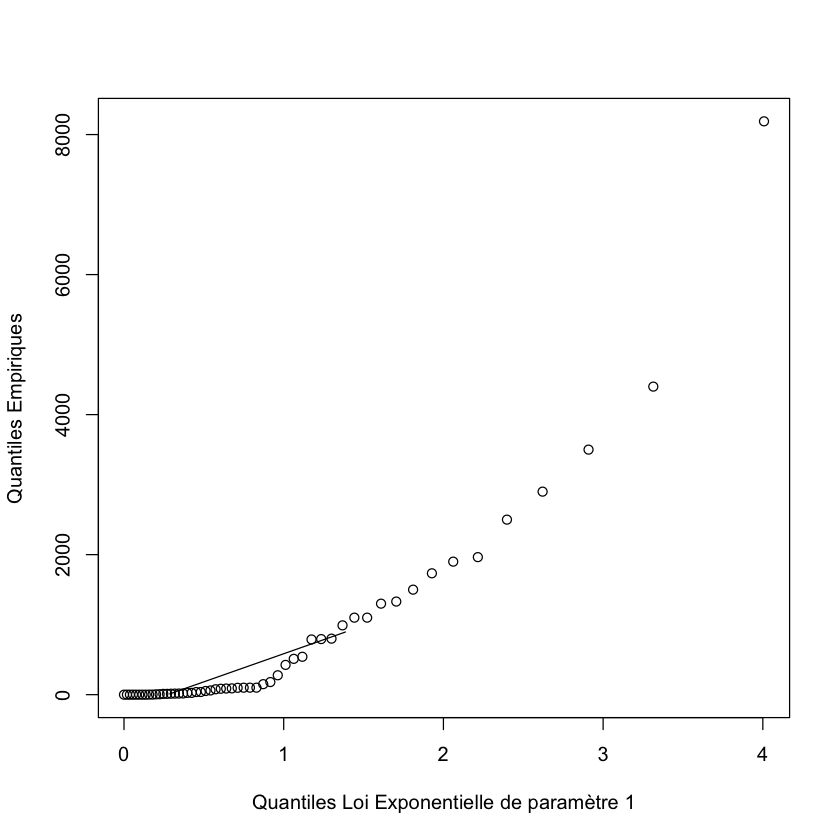

In [101]:
qexp = -log(1-niveaux)

plot(qexp,cost,xlab="Quantiles Loi Exponentielle de paramètre 1",ylab="Quantiles Empiriques")
lines(-log(1-c(0.25,0.75)),c(12.85,895))

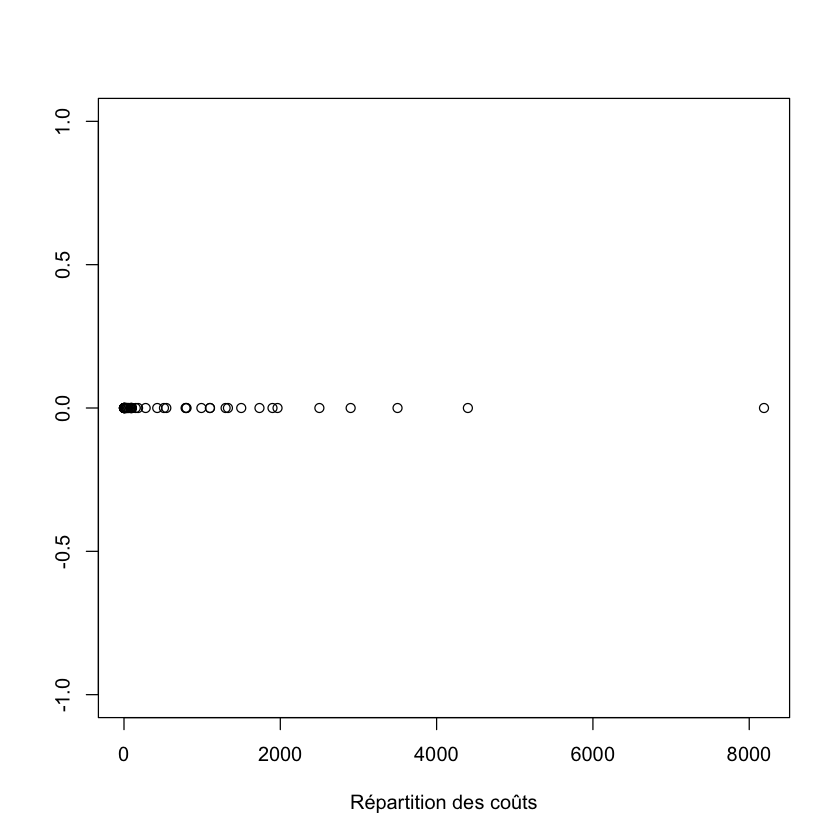

In [153]:

liste_nul = c()

for(i in 1:length(cost1)){
    liste_nul=c(liste_nul,0);
}

plot(c(data[,3]),liste_nul, xlab="Répartition des coûts",ylab="",)

On remarque qu'il est plus fréquent d'avoir des accidents à côut faible que des accidents à coût élévé. Il semblerait que plus le côut de l'accident est élevé plus la fréquence de celui-ci est faible. Visualisons celà à l'aide d'un histogramme. 

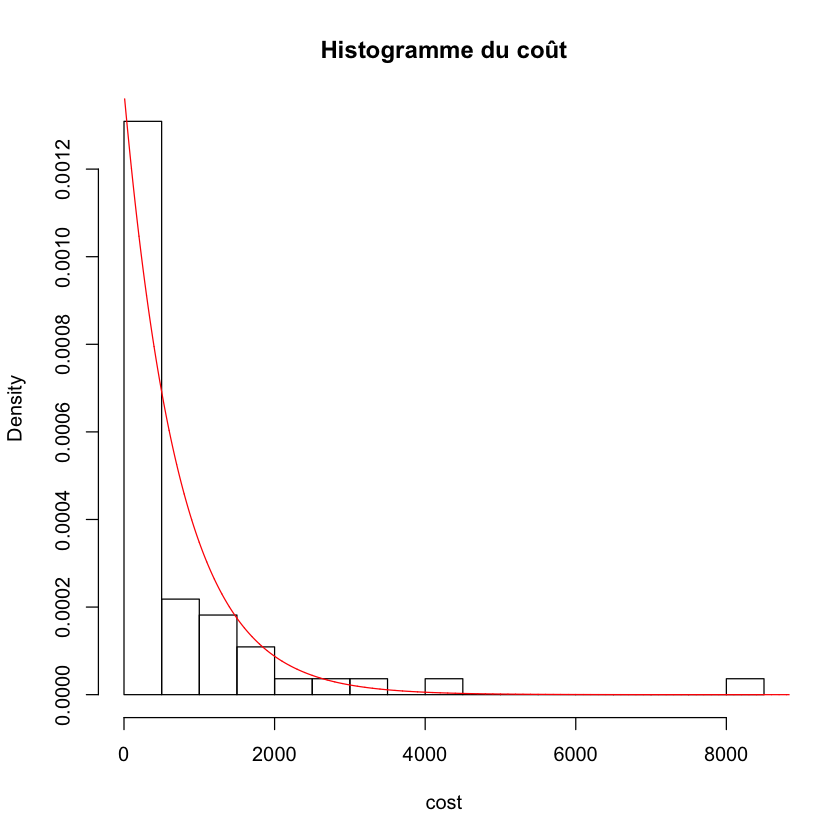

In [160]:
hist(cost,probability=TRUE,main="Histogramme du coût",breaks=19)

m=mean(cost1)

X = seq(0,10000,length.out=10000) 
Y = dexp(X, rate=1/m)


lines(X,Y,col="red")


Les points dans le diagramme Q-Q ne s'alignent pas sur une seule et unique droite, nous n'avons donc pas vraiment un modèle exponentiel, cependant même si l'histogramme ne suit pas vraiment la courbe de densité, on voit que sa forme correspond en grande partie à celle d'une loi exponentielle. Ce modèle n'est en soit peut-être pas le meilleur, mais il a l'air plus cohérent qu'un modèle gaussien. 

## Exercice 2

### 1.

Pour des variables i.i.d., la moyenne empirique est un estimateur sans biais de l'espérance. Ici $g_{1}(\lambda)$ est bien l'espérance de $\epsilon(\lambda) $.
Il reste à montrer que la variance de $g_{1}(\lambda)$ atteint la borne de Cramer-Rao.

Pour tout $ \lambda > 0, \;  g_{1}'(\lambda) = -\frac{1}{\lambda^{2}} $

Puisque les $X_{i}$ sont iid, $I(\lambda) = nI_{1}(\lambda) $

Or $ \forall \lambda > 0, $

$ I_{1}(\lambda) = \mathbb{E}_{\lambda}((\frac{d\, log(p(x,\lambda))}{d\, \lambda})^{2}) = \mathbb{E}_{\lambda}((\frac{d\, log(\lambda\,e^{-\lambda x})}{d\, \lambda})^{2}) = \mathbb{E}_{\lambda}((\frac{(1-\lambda x)}{\lambda})^{2}) = \frac{1}{\lambda} - \frac{2}{\lambda} + \frac{1}{\lambda^{2}} + \frac{1}{\lambda} = \frac{1}{\lambda^{2}} $ En développant dans la formule de transfert et en reconnaissant des moments d'ordres un et deux. 
 
D'autre part, $\mathbb{V}ar_{\lambda}(T_{1}) = \frac{\mathbb{V}ar_{\lambda}(X_{1})}{n} = \frac{1}{n\lambda^{2}}$ car les variables sont i.i.d. 

On a bien: $\mathbb{V}ar_{\lambda}(T_{1}) = \frac{1}{n\lambda^{2}} = \frac{g'(\lambda)^{2}}{I(\lambda)} $

$T_{1}$ est un estimateur efficace car il atteint la borne de Cramer-Rao, il est donc U.V.M.B.



### 2.

Comme $T_{1}$ est un estimateur sans biais de $g_{1}(\lambda)$, d'après la décomposition biais-variance: $R(\lambda,T_{1}(X))= \frac{1}{n\lambda^{2}}$

On a également, $ R(\lambda,T_{1,\alpha}(X))= b\big{(}\lambda,T_{1,\alpha}(X)\big{)}^{2} + \mathbb{V}ar_{\lambda}(\alpha T_{1}) = \big{(}\frac{\alpha-1}{\lambda}\big{)}^{2} + \frac{\alpha^{2}}{n\lambda^{2}}$ d'après la même décomposition. 

On cherche les valeurs de $\alpha > 0$ telles que $ R(\lambda,T_{1,\alpha}(X)) - R(\lambda,T_{1}(X)) < 0\,, \;\forall \lambda >0 $.

$ R(\lambda,T_{1,\alpha}(X)) - R(\lambda,T_{1}(X)) < 0  \\ \Leftrightarrow \big{(}\frac{\alpha-1}{\lambda}\big{)}^{2} + \frac{\alpha^{2}-1}{n\lambda^{2}} < 0 \\ \Leftrightarrow \alpha^{2}\,(n+1) - 2\,\alpha\, n \;+ (n-1) <0 $

Il suffit alors de trouver les racines du polynome $X^{2}(n+1) - 2X\, n \;+ (n-1) <0 $. Le discriminant est égal à 4 on obtient alors comme racines $(\frac{n-1}{n+1},1)$ 

On a un etimateur au risque quadratique plus faible pour $\alpha \in ]\frac{n-1}{n+1},1[$.

Ce résultat n'est pas en contradiction avec la question précédente car certes $T_{1,\alpha}(X)$ a un risque quadratique plus faible, mais il est biaisé alors que $T_{1}(X)$ est le meilleur estimateur non biaisé.



### 3.

La quantité $g_{2}(\lambda)$ s'estime facilement une fois que l'on connait $ \mathbb{E}_ {\lambda}(\varphi(X)) = \frac{1}{\lambda}$ car $g_{2}= log\,2\;\mathbb{E}_ {\lambda}(\varphi(X))(\lambda)$. On remplace $\mathbb{E}_ {\lambda}(\varphi(X))(\lambda)$ par sa moyenne empirique, en d'autres termes $T_{1}(X)$. On choisit donc comme estimateur $T_{1,\log2}(X)$. 

In [106]:
log(2)
(55-1)/(55+1)

[1] 0.6931472

[1] 0.9642857

Clairement, log2 n'appartient pas à $]\frac{n-1}{n+1},1[$, donc $T_{2}$ n'est pas un meilleur estimateur de $g_{1}$ que $T_{1}$.

### 4.

In [117]:
g_1 = mean(cost)
g_1

[1] 726.3364

On choisit cette valeur pour $ g_1 $ dans la suite de l'exercice

### 5.

In [119]:
g_2 = g_1*log(2)

med_emp = median(cost)

g_2 ; med_emp; g_2/med_emp

[1] 503.458

[1] 89.9

[1] 5.6002

Il y a un facteur supérieur à 5 de différence entre la médiane empirique et la médiane obtenue par l'estimateur. Si l'on considère que le coût suit effectivement une loi $\epsilon(\lambda), \; T_{2}$ n'est pas un bon estimateur de la médiane. 

### 6.

En prenant les risques quadratiques calculés à la question 2, on peut tracer le risque de $T_{1}$ et $T_{2}$ comme suit:

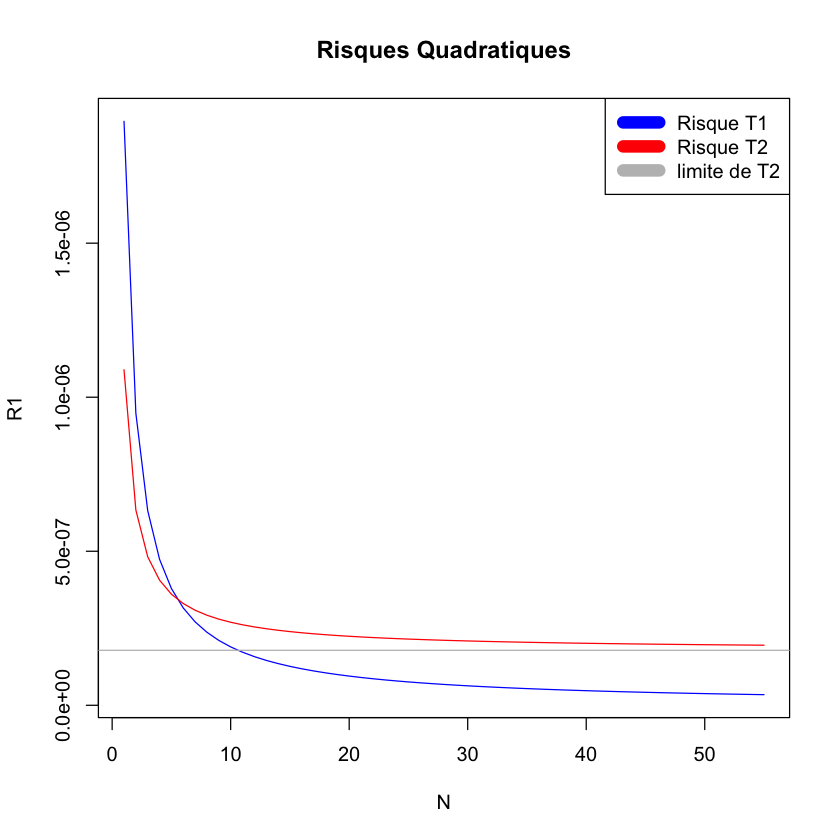

In [157]:
N = (1:n)
R1 = c()
R2 = c()

for(i in (1:n)){
    R1 = c(R1,1/i/(g_1**2)); #risque R1
    R2 = c(R2,((log(2)-1)/g_1)**2 + log(2)**2/i/(g_1**2));  #risque R2 
}
         
plot(N,R1,type="l", col='blue',main= "Risques Quadratiques")
abline(((log(2)-1)/g_1)**2,0, col="grey")
lines(N,R2,col='red',type="l",ylab='Risque',xlab="Nombre d'incidents")

legend("topright",legend = c("Risque T1","Risque T2","limite de T2"),lty=1,
       lwd=10,col=c("blue","red","grey"))

Le risque quadratique de T1 semble tendre vers zéro lorsque le nombre d'échantillons est élevé ce qui est en accord avec le fait que T1 est UVMB (que donc T1 est un estimateur sans bias de $g_1$ et celui ci va minimiser le risque quadratique moyen). 

Le risque quadratique de $T_{2}$ diminue avec le nombre d'échantillons, et a pour limite $\big{(}\frac{\alpha-1}{\lambda}\big{)}^{2}$ qui est le carré du biais, illustrant bien le fait que $T_{2} $ est un estimateur biaisé de $g_1$. 

Comme prévu à la question 3.2, pour n dans un certain intervalle, le risque quadratique de T2 est inférieur à T1. Il est en fait inférieur pour $\frac{n-1}{n+1} < log2 \Leftrightarrow n \leq 5.$

# Exercice 3

Montrons que les fonctions caractéristiques de $T(X)$ et de $H$~ $
\Gamma (n,\lambda)$ sont égales. On aura alors égalité des lois. 

$ \phi_{T(X)}(y) = \mathbb{E}\big{(}e^{iT(x)y}\big{)} $

$= \mathbb{E}\big{(}\prod_{i=1}^{n}e^{iX_{i}y} \big{)} = \mathbb{E}\big{(}e^{iX_{1}y} \big{)}^{n} = \phi_{X}^{n}(y)$ car les variables sont i.i.d. 

Or X suit une loi exponentielle de paramètre $\lambda$, en d'autres termes une loi $\Gamma(1,\lambda)$. Donc: 

$ \phi_{T(X)}(y) = \frac{1}{(1-it\lambda)^{n}}$ qui est bien la fonction caracteristique de H. 




La suite de la question est ci dessous

<img src= delgallo_21-10-2018_23-09-37.jpg> 

### 2.

In [184]:
a = 0.05
b = qgamma(1-a,n,0.001)
T = sum(cost)

test  <- function(T,b){
    if (T > b){
        return (1);
    }
    else
        return (0); 
        
}
    
test(T,b)
b

[1] 0

[1] 67740.09

Le resultat du test est 0 donc pour le niveau $\alpha = 0.05$ on peut affirmer que le coût moyen est inférieur à un million de dollars. 

### 3. 

Sous l'hypothèse $H_{0}$ t suit une loi $\Gamma(55,0.001).$ 

[1] 0.01371749

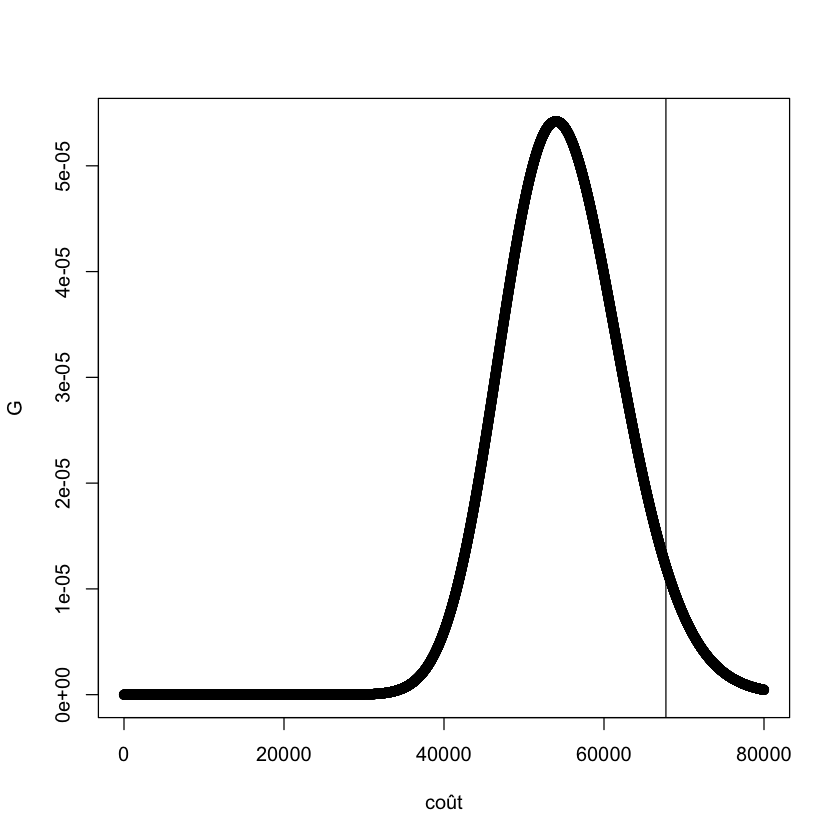

In [197]:
X1= seq(0,80000,length.out=10000)
G = dgamma(X1,n,rate=0.001)
plot(X1,G,xlab = 'coût',)
abline(v = b)
p_val= pgamma(T,shape=n,rate=0.001)
p_val

La zone de rejet de $H_{0}$ est la région à droite de la droite verticale d'abscisse b. 

### 4.

### 5.